C:\Users\AmirHosein\AppData\Local\Temp\ipykernel_7416\2966871240.py:41: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  phi = spsolve(A, s)


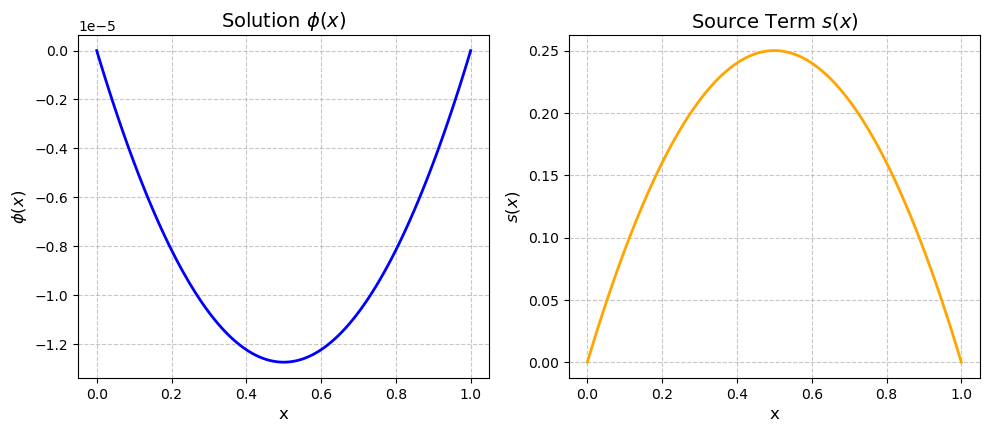

In [2]:
import numpy as np
import matplotlib.pyplot as plt # type: ignore
from scipy.sparse import diags # type: ignore
from scipy.sparse.linalg import spsolve

# Step 1: Define parameters and domain
N = 100                      # Number of grid points
L = 1.0                      # Length of the domain
x = np.linspace(0, L, N)     # Grid points
dx = x[1] - x[0]             # Grid spacing

# Step 2: Boundary conditions
phi_L = 0                    # Boundary value at x=0
phi_R = 0                    # Boundary value at x=1

# Step 3: Define the source term s(x) = x(1 - x)
s = x * (1 - x)

# Step 4: Construct the finite difference matrix for the second derivative
diagonals = [
    np.ones(N) * -2,  # Main diagonal
    np.ones(N-1),     # Upper diagonal
    np.ones(N-1)      # Lower diagonal
]
A = diags(diagonals, [0, 1, -1]) / dx**2  # Sparse matrix representation

# Adjust the matrix for boundary conditions
A = A.toarray()  # Temporarily convert to dense to modify boundary conditions
A[0, :] = 0
A[0, 0] = 1
A[-1, :] = 0
A[-1, -1] = 1

# Convert back to sparse format
A = diags(A.diagonal(), 0)

# Step 5: Adjust the source term for boundary conditions
s[0], s[-1] = phi_L, phi_R

# Step 6: Solve the linear system using sparse solver
phi = spsolve(A, s)


# Step 8: Plotting all results

# Create a figure for multiple subplots
plt.figure(figsize=(10, 8))

# Subplot 1: Solution phi(x)
plt.subplot(2, 2, 1)
plt.plot(x, phi, label=r"$\phi(x)$", color="blue", linewidth=2)
plt.title(r"Solution $\phi(x)$", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel(r"$\phi(x)$", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

# Subplot 2: Source term s(x)
plt.subplot(2, 2, 2)
plt.plot(x, s, label=r"$s(x) = x(1 - x)$", color="orange", linewidth=2)
plt.title(r"Source Term $s(x)$", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel(r"$s(x)$", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)



# Adjust layout and show the plot
plt.tight_layout()
plt.show()
